In [1]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load dataset
data = load_breast_cancer()
X = data.data
y = data.target

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split into training and testing
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [3]:
from sklearn.svm import SVC

# Linear Kernel
svm_linear = SVC(kernel='linear', C=1)
svm_linear.fit(X_train, y_train)

# Accuracy
print("Linear Kernel Accuracy:", svm_linear.score(X_test, y_test))

Linear Kernel Accuracy: 0.956140350877193


In [5]:
# RBF Kernel
svm_rbf = SVC(kernel='rbf', C=1, gamma='scale')
svm_rbf.fit(X_train, y_train)

# Accuracy
print("RBF Kernel Accuracy:", svm_rbf.score(X_test, y_test))

RBF Kernel Accuracy: 0.9736842105263158


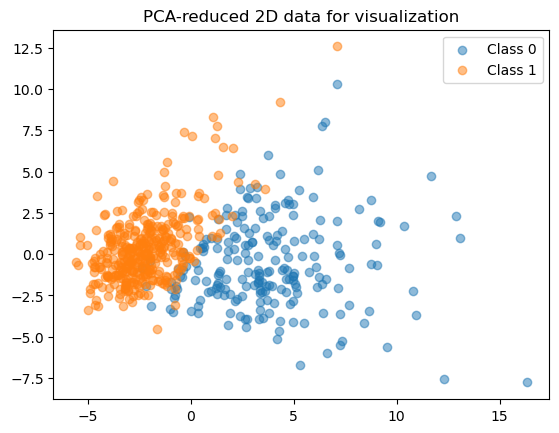

In [7]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Reduce to 2D for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

X_train_2D, X_test_2D = X_pca[y==0], X_pca[y==1]

plt.scatter(X_train_2D[:, 0], X_train_2D[:, 1], label="Class 0", alpha=0.5)
plt.scatter(X_test_2D[:, 0], X_test_2D[:, 1], label="Class 1", alpha=0.5)
plt.legend()
plt.title("PCA-reduced 2D data for visualization")
plt.show()

In [9]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'C': [0.1, 1, 10],
    'gamma': ['scale', 0.01, 0.1, 1],
    'kernel': ['rbf']
}

grid = GridSearchCV(SVC(), param_grid, refit=True, cv=5)
grid.fit(X_train, y_train)

print("Best Parameters:", grid.best_params_)
print("Best Cross-Validated Score:", grid.best_score_)

Best Parameters: {'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}
Best Cross-Validated Score: 0.9736263736263737


In [11]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(grid.best_estimator_, X_scaled, y, cv=5)
print("Cross-validation Accuracy:", scores.mean())

Cross-validation Accuracy: 0.9736376339077782
